In [89]:
import pandas as pd
df = pd.read_excel("Sales.xlsx",'Sales')
df
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X = df[['Year']]
y = df[['TotalCost']]
print("Records count:",len(df)) 
df

Records count: 23


,Year,TotalCost
0,1997,499.25
1,1998,499.50
2,1999,499.75
3,2000,500.00
4,2001,1000.50
5,2002,1001.00
6,2003,1001.50
7,2004,1002.00
8,2005,1002.50
9,2006,1504.50


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X.values.reshape(-1, 1))#transforms our numpy array x from a 1D array to a 2D array – this is required,

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(poly_features, y)
poly_features

array([[1.997000e+03, 3.988009e+06],
       [1.998000e+03, 3.992004e+06],
       [1.999000e+03, 3.996001e+06],
       [2.000000e+03, 4.000000e+06],
       [2.001000e+03, 4.004001e+06],
       [2.002000e+03, 4.008004e+06],
       [2.003000e+03, 4.012009e+06],
       [2.004000e+03, 4.016016e+06],
       [2.005000e+03, 4.020025e+06],
       [2.006000e+03, 4.024036e+06],
       [2.007000e+03, 4.028049e+06],
       [2.008000e+03, 4.032064e+06],
       [2.009000e+03, 4.036081e+06],
       [2.010000e+03, 4.040100e+06],
       [2.011000e+03, 4.044121e+06],
       [2.012000e+03, 4.048144e+06],
       [2.013000e+03, 4.052169e+06],
       [2.014000e+03, 4.056196e+06],
       [2.015000e+03, 4.060225e+06],
       [2.016000e+03, 4.064256e+06],
       [2.017000e+03, 4.068289e+06],
       [2.018000e+03, 4.072324e+06],
       [2.019000e+03, 4.076361e+06]])

In [91]:
import numpy as np
print ('Predicted Value:',regressor.predict(poly.fit_transform([[2025]])))

Predicted Value: [[9839.45158102]]


In [92]:
print (regressor.predict(poly.fit_transform([[2020]])))

[[6510.6338227]]


In [93]:
y_pred = regressor.predict(poly.fit_transform(X_test))
y_pred

array([[ 754.50437605],
       [3099.47473179],
       [ 697.36363637],
       [ 985.55830039],
       [3497.55561829],
       [2083.68718238],
       [5387.30434783],
       [1145.69904009],
       [2731.13636364],
       [1804.57636929],
       [4382.94494636],
       [3925.37902315]])

In [94]:
y_test

,TotalCost
6,1001.50
16,3019.50
1,499.50
8,1002.50
17,3021.00
13,1507.50
21,6054.00
9,1504.50
15,3018.00
12,1506.75


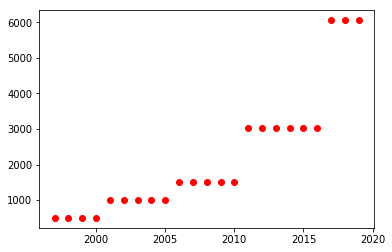

In [96]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color='red') #notice the line curve, it's not linear

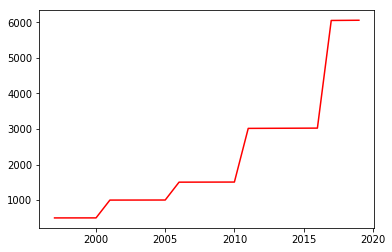

In [97]:
plt.plot(X, y, color='red') #notice the line curve, it's not linear

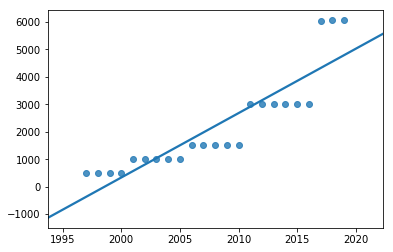

In [98]:
import seaborn as sns
sns.regplot(X, y, ci=None)

In [99]:
#Model Evaluation
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))
#print('Balanced Accuracy:', metrics.balanced_accuracy_score(y_test, y_pred)) #Valid only for classfication

Mean Absolute Error (MAE): 455.54408996800584
Mean Squared Error (MSE): 339339.2644545695
Explained Variance Score: 0.8559164305062474
Mean Squared Log Error: 0.05451599526384463
Median Absolute Error: 328.3136646002531
R^2: 0.8381859029113913
